Part-I: Multiple Linear Regression[17.5]:
1. Data Understanding, Cleaning and Transformation[2]:


Understand what is data about and why do you think the data was collected, and what research questions
data can answers.


(a) You can explain your logic in the text cell of your notebook.

Here the dataset is about the power plant where there are 5 different columns. The column names are in the short form whose full form are:
AT: Ambient Temperature. 
V: Exhaust Vacuum 
AP: Ambient Pressure
RH: Relative Humidity 
PE: Power Output . These attributes can be used to study the relationship between different parameters of the power plant and energy output, helping to improve the plant's performance and efficiency.we can perform various data analysis techniques on this dataset such as statistical analysis, visualization, and machine learning to find patterns and relationships between the different variables. This can help us to identify the factors that contribute most to the energy output of the power plant and make informed decisions to improve it.

(b) Based on your research questions Identify Dependent and Independent Variables.

The dependent variable for this module is combined energy output. There are all other attributes that effects the combined energy variable. So rest of all 4 columns acts as the independent variable. By taking all the possible independent variable we can make the module accurate. The 4 independent variable includes AT: Ambient Temperature. V: Exhaust Vacuum AP: Ambient Pressure RH: Relative Humidity.

(c) Use pandas to load your dataset and observe the data.

In [5]:
#mounting from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


In [7]:
#loading dataset using pandas library
path = "/content/drive/MyDrive/3.csv"
df = pd.read_csv(path)

2. Data Analysis and Visualization[2.5]:

Find the descriptive statistics of your data using pandas and use matplotlib or any other library to make
various plots to generate insights from dataset.

To generate better insights from the data make visualization and plot of your Independent variable against
Dependent variable.

In [8]:
# Checking the first 5 rows of the data
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [9]:
# Summary statistics of the data
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [10]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


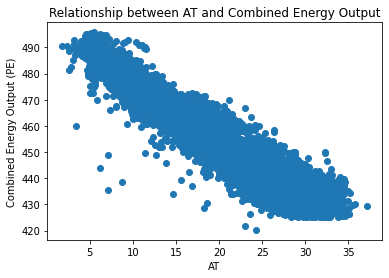

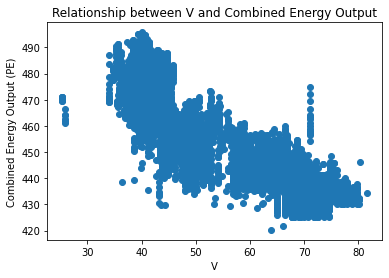

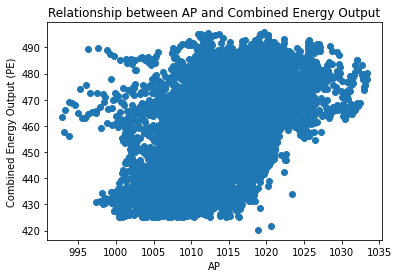

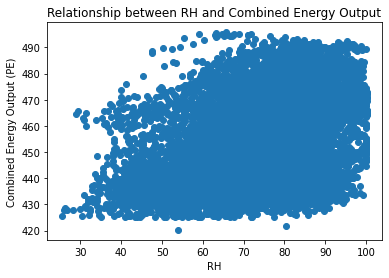

In [11]:
# Visualizing the relationship between the independent variables and the combined energy output
independent_variables = ["AT", "V", "AP", "RH"]
for variable in independent_variables:
    plt.scatter(df[variable], df["PE"])
    plt.xlabel(variable)
    plt.ylabel("Combined Energy Output (PE)")
    plt.title(f"Relationship between {variable} and Combined Energy Output")
    plt.show()

In [12]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

3. Build Primary Model[Multiple Linear Regression][5]:

Once you have cleaned, transformed and Visualize your data build Multiple Linear Regression Model from
Scratch.

In [13]:
# Splitting the data into training and testing sets
X = df.drop("PE", axis=1)
Y = df["PE"]

In [14]:
X

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20
...,...,...,...,...
9563,15.12,48.92,1011.80,72.93
9564,33.41,77.95,1010.30,59.72
9565,15.99,43.34,1014.20,78.66
9566,17.65,59.87,1018.58,94.65


In [15]:
Y

0       480.48
1       445.75
2       438.76
3       453.09
4       464.43
         ...  
9563    462.59
9564    432.90
9565    465.96
9566    450.93
9567    451.67
Name: PE, Length: 9568, dtype: float64

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6697, 4), (2871, 4), (6697,), (2871,))

In [17]:
W = np.zeros(X_train.shape[1])
B = 0
W.shape

(4,)

In [18]:
#Define the cost function
def cost_function(X, Y, W, B):
    """ Parameters:
    This function finds the Mean Square Error.
    Input parameters:
      X: Feature Matrix
      Y: Target Matrix
      W: Weight Matrix
    Output Parameters:
      J: accumulated mean square error.
    """
    y_pred = X.dot(W) + B
    m = len(Y) # len of data in your datasets
    J = np.sum((y_pred - Y) ** 2)/(2 * m)
    return J

In [19]:
inital_cost = cost_function(X_train, Y_train, W , B)
print(inital_cost)

103326.42889655817


In [20]:
def gradient_descent(X, Y, W,B, alpha = 0.000001, iterations = 10000):
    cost_history = [0] * iterations
    m = len(Y)
    for i in range(iterations):
        # Hypothesis Values
        Y_pred = X.dot(W) + B
        # Difference b/w Hypothesis and Actual Y
        loss = Y_pred - Y
        # Gradient Calculation
        dw = (X.T.dot(loss) ) / m
        db = np.sum(loss)/m
        # Changing Values of B using Gradient
        W = W - alpha * dw
        B = B - alpha * db
        # New Cost Value
        cost = cost_function(X, Y, W, B)
        cost_history[i] = cost
    return W, B, cost_history[-1]


In [21]:
new_weights,new_bias, cost_history = gradient_descent(X_train, Y_train, W, B)
# New Values of
print(new_weights)
print(new_bias)
# Final Cost of our Iterations.
print(cost_history)

AT   -0.473500
V    -0.667080
AP    0.481043
RH    0.170114
dtype: float64
0.0003343877282977743
22.51369242889724


4. Model Evaluation[1]:

Pick an appropriate evaluation metric to evaluate your model on the test set.

In [22]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
  """
  This Function calculates the Root Mean Squres.
  Input Arguments:
    Y: Array of actual(Target) Dependent Varaibles.
    Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
    rmse: Root Mean Square.
  """
  rmse = np.sqrt(sum((Y-Y_pred)**2)/len(Y))
  return rmse

# Model Evaluation - R2

def r2(Y, Y_pred):
  """
   This Function calculates the R Squared Error.
  Input Arguments:
    Y: Array of actual(Target) Dependent Varaibles.
    Y_pred: Array of predeicted Dependent Varaibles.  
  Output Arguments:
    rsquared: R Squared Error.
    """
  mean_y = np.mean(Y)
  ss_tot = sum((Y - mean_y) ** 2)
  ss_res = sum((Y - Y_pred) ** 2)
  r2 = 1 - (ss_res / ss_tot)
  return r2
  

In [23]:
Y_pred = X_test.dot(new_weights) + new_bias
print(rmse(Y_test, Y_pred))
print(r2(Y_test, Y_pred))

6.770540354224163
0.8421963356380556


5. Dimensionality Reduction[6]:

Apply Principal Component Analysis to reduce the dimension and rebuild the model with reduced fea-
tures,evaluate the model and Compare the output with the evaluation from step 4.

In [24]:
def standard_scaler(X):
    # Calculate the mean of the input array, X, along the columns (axis=0)
    mean = np.mean(X, axis=0)
    # Calculate the standard deviation of the input array, X, along the columns (axis=0)
    scale = np.std(X, axis=0)
    # Scale the input array by subtracting the mean and dividing by the standard deviation
    X_scaled = (X - mean) / scale
    # Return the scaled array
    return X_scaled

In [25]:
scaled_df = standard_scaler(df.drop(columns = ["PE"]))
scaled_df["PE"] = df["PE"]
scaled_df

,AT,V,AP,RH,PE
0,-1.517862,-1.065205,-0.407357,1.143944,480.48
1,0.535255,0.329277,-0.313057,0.061031,445.75
2,1.353818,0.204151,-1.028729,-2.150688,438.76
3,-0.077996,-0.363242,-1.016941,0.238434,453.09
4,-1.053562,-1.073861,0.651838,1.636427,464.43
...,...,...,...,...,...
9563,-0.608049,-0.423838,-0.245699,-0.025958,462.59
9564,1.846298,1.860689,-0.498289,-0.930783,432.90
9565,-0.491303,-0.862958,0.158445,0.366521,465.96
9566,-0.268547,0.437876,0.896008,1.461763,450.93


In [26]:
# Creating an instance of PCA with 4 component
pca = PCA(2)
# Fit the scaled data to the PCA model
pca.fit(scaled_df.drop(columns = ["PE"]))
# Transform the scaled data to reduced features using the PCA model
reduced_features = pca.transform(scaled_df.drop(columns =  ["PE"]))
# Print the shape of the original and reduced features
print(f"original features shape : {scaled_df.drop(columns =  ['PE']).shape}")
print(f"reduced features shape : {reduced_features.shape}")

original features shape : (9568, 4)
reduced features shape : (9568, 2)


In [27]:
# Create a dataframe from the reduced features
reduced_df = pd.DataFrame(data = reduced_features, columns = ["column1", "column2"])
# Add a column for our target to the reduced dataframe
reduced_df["Target"] = np.array(scaled_df["PE"])
reduced_df

,column1,column2,Target
0,-1.800922,1.095167,480.48
1,0.616635,0.255076,445.75
2,2.182470,-0.999932,438.76
3,0.068864,0.806605,453.09
4,-2.136207,0.755374,464.43
...,...,...,...
9563,-0.501845,0.127811,462.59
9564,2.732838,-0.284569,432.90
9565,-0.988840,0.111827,465.96
9566,-0.839565,0.577013,450.93


In [28]:
# Splitting the data into training and testing sets
X1 = reduced_df[["column1","column2"]]
Y1 = reduced_df["Target"]

In [29]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.3, random_state=2)
X_train1.shape, X_test1.shape, Y_train1.shape, Y_test1.shape

((6697, 2), (2871, 2), (6697,), (2871,))

In [30]:
W1 = np.zeros(X_train1.shape[1])
B1 = 0

In [31]:
inital_cost1 = cost_function(X_train1, Y_train1, W1, B1)
print(inital_cost1)

103326.42889655817


In [32]:
# 100000 Iterations
new_weights1, new_bias1 ,cost_history1 = gradient_descent(X_train1, Y_train1, W1,B1, 0.001,10000)
# New Values of
print(new_weights1)
print(new_bias1)
# Final Cost of our Iterations.
print(cost_history1)

column1   -10.010976
column2    -1.516653
dtype: float64
454.34401863159337
22.51747881831478


In [33]:
X_test1

,column1,column2
2843,2.501186,1.418066
9115,-1.387826,-0.094507
4618,2.298453,-1.700090
4205,-0.864430,1.014817
9181,-0.997691,-1.037861
...,...,...
8268,0.749382,-0.170549
9126,-2.673114,-1.539027
1379,0.787099,-1.340651
6789,1.054436,-0.393127


In [34]:
Y_pred1 = X_test1.dot(new_weights1) + new_bias1
Y_pred1

2843    427.153988
9115    468.380849
4618    433.912704
4205    461.458678
9181    465.905955
           ...    
8268    447.100636
9126    483.438673
1379    448.497692
6789    444.384319
8287    442.530236
Length: 2871, dtype: float64

In [35]:
comp = pd.DataFrame()
comp["actual"] = Y_test1
comp["predicted"] = Y_pred1
comp

,actual,predicted
2843,434.85,427.153988
9115,471.05,468.380849
4618,431.79,433.912704
4205,479.44,461.458678
9181,460.56,465.905955
...,...,...
8268,443.74,447.100636
9126,479.43,483.438673
1379,455.02,448.497692
6789,442.82,444.384319


In [36]:
print("After PCA rmse : - ",rmse(Y_test1, Y_pred1))
print("After PCA r^2 : - ",r2(Y_test1, Y_pred1))

After PCA rmse : -  6.845925455416914
After PCA r^2 : -  0.8386627115732682


6. Conclusion[1]:

Conclude the result of the comparison.

So as we have completed the module algorithm along with the optimiztion we can get that before and after PCA the initial cost has been changed where as the module evaluation rmse and r^2 is same. This means PCA has been effective in reducing the dimensionality of the data without losing the accuracy of the model. The lower cost after PCA directs us that PCA has successfully reduced the complexity of the data, which can lead to faster and more efficient model training and prediction. However the same model evaluation before and after PCA directs us that the important information contained in variable has been preserved. 